<a href="https://colab.research.google.com/github/IshantWadhwa4/COVID-19-EDA/blob/master/covid19_Classification_by_Country.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np

In [0]:
# world data of confirmed cases
url_confirmed = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
data_confirmed = pd.read_csv(url_confirmed)
data_confirmed['Province/State'].fillna(data_confirmed['Country/Region'],inplace = True)

In [3]:
data_confirmed

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20
0,Afghanistan,Afghanistan,33.00000,65.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,4,4,5,7,7,7,11,16,21,22,22,22,24,24,40,40,74,84,94,110,110,120,170,174,237,273,281,299,349,367
1,Albania,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,10,12,23,33,38,42,51,55,59,64,70,76,89,104,123,146,174,186,197,212,223,243,259,277,304,333,361,377
2,Algeria,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,3,5,12,12,17,17,19,20,20,20,24,26,37,48,54,60,74,87,90,139,201,230,264,302,367,409,454,511,584,716,847,986,1171,1251,1320,1423
3,Andorra,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,39,39,53,75,88,113,133,164,188,224,267,308,334,370,376,390,428,439,466,501,525
4,Angola,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,3,3,3,4,4,5,7,7,7,8,8,8,10,14,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,Falkland Islands (Islas Malvinas),United Kingdom,-51.79630,-59.523600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2
259,Saint Pierre and Miquelon,France,46.88520,-56.315900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
260,South Sudan,South Sudan,6.87700,31.307000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
261,Western Sahara,Western Sahara,24.21550,-12.885800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,4


In [0]:
# world data of death cases
url_Deaths = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
data_death = pd.read_csv(url_Deaths)
data_death['Province/State'].fillna(data_death['Country/Region'],inplace = True)


In [0]:
# world data of Recovered cases
url_Recovered = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
data_Recovered = pd.read_csv(url_Recovered)
data_Recovered['Province/State'].fillna(data_Recovered['Country/Region'],inplace = True)

### list of country having more than 800 cases



In [0]:
data_confirmed_number = data_confirmed.melt(id_vars=["Province/State", "Country/Region","Lat","Long"], 
        var_name="Date", 
        value_name="confirmed")

In [0]:
data_500 = data_confirmed_number[data_confirmed_number['confirmed'] >  800]

In [0]:
country = list(set(data_500['Country/Region']))

#### Get data for above countries

In [0]:
data_confirmed = data_confirmed[data_confirmed['Country/Region'].isin(country)]

In [0]:
confirmed_cases = data_confirmed.drop(["Province/State","Lat","Long"],axis=1)

In [0]:
confirmed_cases = confirmed_cases.groupby('Country/Region').sum()

In [0]:
confirmed_cases_country = confirmed_cases.index.tolist()

In [0]:
confirmed_cases = confirmed_cases.values

#### prepare Data

In [0]:
from sklearn.preprocessing import normalize # to rescale the data
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

In [0]:
normalize_confirmed_cases = normalize(confirmed_cases)

In [16]:
normalize_confirmed_cases

array([[0.        , 0.        , 0.        , ..., 0.38933121, 0.41080511,
        0.44286036],
       [0.        , 0.        , 0.        , ..., 0.38019902, 0.38019902,
        0.40718765],
       [0.        , 0.        , 0.        , ..., 0.35814976, 0.3823365 ,
        0.38745292],
       ...,
       [0.        , 0.        , 0.        , ..., 0.41333366, 0.44133913,
        0.4450507 ],
       [0.        , 0.        , 0.        , ..., 0.38681351, 0.46237708,
        0.53357133],
       [0.        , 0.        , 0.        , ..., 0.37332956, 0.4257031 ,
        0.45947916]])

In [0]:
mergings = linkage(normalize_confirmed_cases, method='complete')

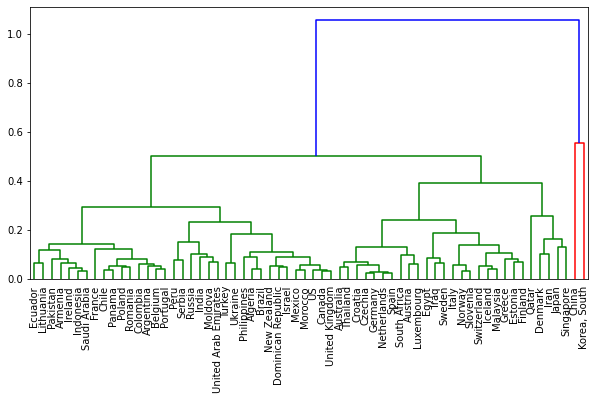

In [18]:
# the first line is written for you - it sets the size of your plot
plt.figure(figsize=(10, 5))

dendrogram(
    mergings,
    labels=confirmed_cases_country,
    leaf_rotation=90.,
    leaf_font_size=10
)
plt.show()

In [0]:
from sklearn.cluster import AgglomerativeClustering

In [0]:
model = AgglomerativeClustering(n_clusters=8, affinity='euclidean', linkage='complete')
model.fit(normalize_confirmed_cases)
labels = model.labels_

In [21]:
len(labels)

64

In [0]:
country_classification = pd.DataFrame(confirmed_cases)

In [0]:
country_classification.columns = data_confirmed.columns[4:] 

In [0]:
country_classification['Country'] = confirmed_cases_country
country_classification['labels'] = labels

In [0]:
country_classification['Total_cases'] = country_classification['4/6/20']

In [0]:


import seaborn as sns
% matplotlib inline



In [28]:
import plotly.express as px
fig = px.histogram(country_classification, x="Country", color="labels",y="Total_cases",histfunc='max')
fig.show()